In [21]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_augmentation = ImageDataGenerator(
        rescale=1./255,
        rotation_range=0.2,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [24]:
train_generator = train_augmentation.flow_from_directory(
        'dataset/training_set',
        target_size=(128, 128),
        batch_size=128,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [25]:
test_augmentation = ImageDataGenerator(rescale=1./255)

In [26]:
validation_generator = test_augmentation.flow_from_directory(
        'dataset/test_set',
        target_size=(128, 128),
        batch_size=128,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [27]:
conv_base = VGG16(input_shape=(128,128,3), include_top = False, weights = 'imagenet')

In [28]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
for layer in conv_base.layers:
    layer.trainable = False

In [30]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [32]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
history = model.fit(train_generator , epochs = 5, verbose = 2, steps_per_epoch = 8,
                    validation_data = validation_generator)


Epoch 1/5
8/8 - 279s - 35s/step - accuracy: 0.5205 - loss: 1.8935 - val_accuracy: 0.5740 - val_loss: 0.7676
Epoch 2/5
8/8 - 302s - 38s/step - accuracy: 0.6299 - loss: 0.6435 - val_accuracy: 0.7100 - val_loss: 0.5196
Epoch 3/5
8/8 - 290s - 36s/step - accuracy: 0.7451 - loss: 0.5086 - val_accuracy: 0.8430 - val_loss: 0.3865
Epoch 4/5
8/8 - 331s - 41s/step - accuracy: 0.8047 - loss: 0.4316 - val_accuracy: 0.8225 - val_loss: 0.3813
Epoch 5/5
8/8 - 355s - 44s/step - accuracy: 0.7959 - loss: 0.4302 - val_accuracy: 0.8435 - val_loss: 0.3591


In [34]:
import matplotlib.pyplot as plt

In [35]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

In [36]:
epoch_count = range(1, len(training_loss)+1)

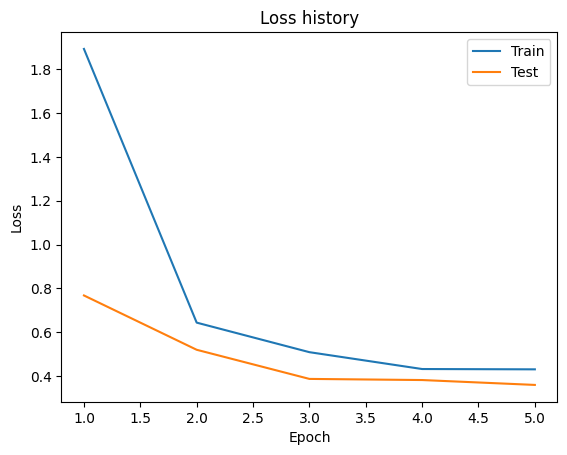

In [37]:
plt.plot(epoch_count, training_loss)
plt.plot(epoch_count, test_loss)
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

In [38]:
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

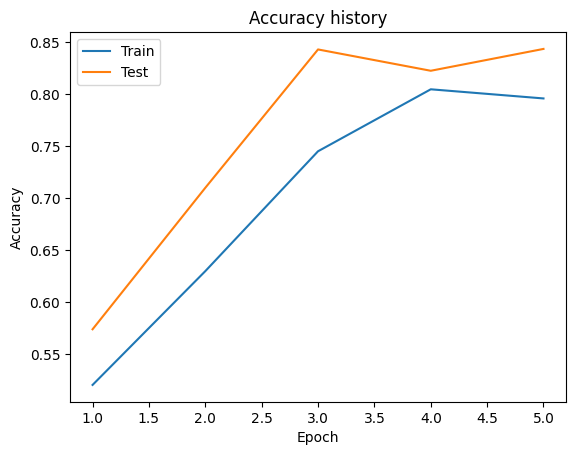

In [39]:
plt.plot(epoch_count, training_acc)
plt.plot(epoch_count, test_acc)
plt.title('Accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

In [42]:
import os

# Sauvegarde au format natif Keras
model.save('cat_dog_vgg16_model.keras')  # <- format recommandé
print("✅ Modèle VGG16 sauvegardé dans: cat_dog_vgg16_model.keras")

# Vérifier que le fichier existe
if os.path.exists('cat_dog_vgg16_model.keras'):
    taille = os.path.getsize('cat_dog_vgg16_model.keras') / (1024*1024)
    print(f"📁 Taille du fichier: {taille:.2f} MB")


✅ Modèle VGG16 sauvegardé dans: cat_dog_vgg16_model.keras
📁 Taille du fichier: 80.22 MB
